<a href="https://colab.research.google.com/github/peteray-dev/Machine_Learning_Cp/blob/master/Copy_of_mlc_2324_w6_lab_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, ParameterGrid

import sys
if 'google.colab' in sys.modules:
    !pip install -q dtreeviz
import dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 1.4 MB/s eta 0:00:00


In [ ]:
adv = pd.read_csv(
    'https://raw.githubusercontent.com/gerberl/6G7V0015-2324/main/datasets/Advertising.csv',
    index_col=0
)

In [ ]:
adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:
X, y = adv.drop(columns='sales'), adv['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
dtr = DecisionTreeRegressor(max_depth=1)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [ ]:
print(export_text(dtr, feature_names=X.columns.to_list()))

|--- TV <= 130.25
|   |--- value: [9.95]
|--- TV >  130.25
|   |--- value: [17.21]



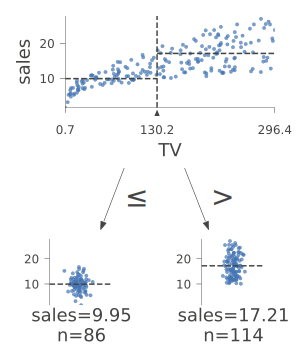

In [ ]:
dtv = dtreeviz.model(dtr, X, y, feature_names=X.columns.tolist(), target_name='sales')
dtv.view(fontname='sans-serif', scale=2)

In [ ]:
mean_absolute_error(y_test, dtr.predict(X_test)), mean_absolute_error(y_train, dtr.predict(X_train))

(3.270034270813934, 3.001605761470168)

In [ ]:
#Evaluating different configurion to get the best model


In [ ]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [ ]:
param_grid ={
    'max_depth': [1,3,4,8,10],
    'min_samples_leaf': [10, 20, 30]
}

In [ ]:
from sklearn.model_selection import ParameterGrid
list(ParameterGrid(param_grid))

[{'max_depth': 1, 'min_samples_leaf': 10},
 {'max_depth': 1, 'min_samples_leaf': 20},
 {'max_depth': 1, 'min_samples_leaf': 30},
 {'max_depth': 3, 'min_samples_leaf': 10},
 {'max_depth': 3, 'min_samples_leaf': 20},
 {'max_depth': 3, 'min_samples_leaf': 30},
 {'max_depth': 4, 'min_samples_leaf': 10},
 {'max_depth': 4, 'min_samples_leaf': 20},
 {'max_depth': 4, 'min_samples_leaf': 30},
 {'max_depth': 8, 'min_samples_leaf': 10},
 {'max_depth': 8, 'min_samples_leaf': 20},
 {'max_depth': 8, 'min_samples_leaf': 30},
 {'max_depth': 10, 'min_samples_leaf': 10},
 {'max_depth': 10, 'min_samples_leaf': 20},
 {'max_depth': 10, 'min_samples_leaf': 30}]

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(dt, param_grid, return_train_score=True)

In [ ]:
adv_result = clf.fit(X_train, y_train)

In [ ]:
adv_df = pd.DataFrame(adv_result.cv_results_)

In [ ]:
adv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002455,0.001100,0.001526,0.000427,1,10,"{'max_depth': 1, 'min_samples_leaf': 10}",0.396925,0.327750,0.497276,...,0.395169,0.078856,14,0.480224,0.478109,0.471865,0.464833,0.514469,0.481900,0.017146
1,0.001824,0.000120,0.001317,0.000053,1,20,"{'max_depth': 1, 'min_samples_leaf': 20}",0.396925,0.327750,0.497276,...,0.395169,0.078856,13,0.480224,0.478109,0.471865,0.464833,0.514469,0.481900,0.017146
2,0.001788,0.000070,0.001302,0.000017,1,30,"{'max_depth': 1, 'min_samples_leaf': 30}",0.396925,0.327750,0.497276,...,0.395169,0.078856,14,0.480224,0.478109,0.471865,0.464833,0.514469,0.481900,0.017146
3,0.001998,0.000344,0.001335,0.000062,3,10,"{'max_depth': 3, 'min_samples_leaf': 10}",0.831524,0.748541,0.839492,...,0.823291,0.040329,4,0.905765,0.912731,0.906251,0.900887,0.904391,0.906005,0.003851
4,0.001823,0.000079,0.001302,0.000025,3,20,"{'max_depth': 3, 'min_samples_leaf': 20}",0.705726,0.728080,0.812527,...,0.780187,0.054959,5,0.831732,0.809919,0.822473,0.841449,0.847392,0.830593,0.013377


In [ ]:
adv_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [ ]:
adv_df[['mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf',
        'mean_train_score', 'std_train_score',
        'mean_test_score',  'std_test_score', 'rank_test_score'
       ]].sort_values('rank_test_score')

,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,mean_train_score,std_train_score,mean_test_score,std_test_score,rank_test_score
9,0.001402,0.000130,8,10,0.929581,0.009969,0.864449,0.030845,1
12,0.002046,0.000163,10,10,0.929581,0.009969,0.864449,0.030845,1
6,0.001343,0.000095,4,10,0.928181,0.009360,0.858431,0.035624,3
3,0.001335,0.000062,3,10,0.906005,0.003851,0.823291,0.040329,4
4,0.001302,0.000025,3,20,0.830593,0.013377,0.780187,0.054959,5
10,0.001283,0.000027,8,20,0.830593,0.013377,0.780187,0.054959,5
13,0.001984,0.000188,10,20,0.830593,0.013377,0.780187,0.054959,5
7,0.001303,0.000039,4,20,0.830593,0.013377,0.780187,0.054959,8
14,0.002254,0.000349,10,30,0.766488,0.024212,0.700720,0.076327,9
5,0.001320,0.000053,3,30,0.766488,0.024212,0.700720,0.076327,10


In [ ]:
adv_result.best_estimator_

DecisionTreeRegressor(max_depth=8, min_samples_leaf=10)

In [ ]:
adv_result.best_params_

{'max_depth': 8, 'min_samples_leaf': 10}

In [ ]:
dt_bp = DecisionTreeRegressor(max_depth=8, min_samples_leaf=10)
dt_bp.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=10)

In [ ]:
print(export_text(dt_bp, feature_names=X.columns.to_list()))

|--- TV <= 130.25
|   |--- TV <= 33.30
|   |   |--- value: [6.81]
|   |--- TV >  33.30
|   |   |--- radio <= 27.10
|   |   |   |--- radio <= 13.30
|   |   |   |   |--- value: [9.79]
|   |   |   |--- radio >  13.30
|   |   |   |   |--- value: [11.21]
|   |   |--- radio >  27.10
|   |   |   |--- value: [13.09]
|--- TV >  130.25
|   |--- radio <= 26.85
|   |   |--- radio <= 9.70
|   |   |   |--- radio <= 3.80
|   |   |   |   |--- value: [11.40]
|   |   |   |--- radio >  3.80
|   |   |   |   |--- value: [12.42]
|   |   |--- radio >  9.70
|   |   |   |--- TV <= 190.80
|   |   |   |   |--- value: [14.27]
|   |   |   |--- TV >  190.80
|   |   |   |   |--- value: [15.85]
|   |--- radio >  26.85
|   |   |--- TV <= 210.75
|   |   |   |--- value: [18.74]
|   |   |--- TV >  210.75
|   |   |   |--- radio <= 35.30
|   |   |   |   |--- value: [19.89]
|   |   |   |--- radio >  35.30
|   |   |   |   |--- value: [23.71]



In [ ]:
dtv = dtreeviz.model(dt_bp, X, y, feature_names=X.columns.tolist(), target_name='sales')
dtv.view(fontname='sans-serif', scale=2)

In [ ]:
dt_4 = DecisionTreeRegressor(max_depth=4, min_samples_leaf=10)
dt_4.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=10)

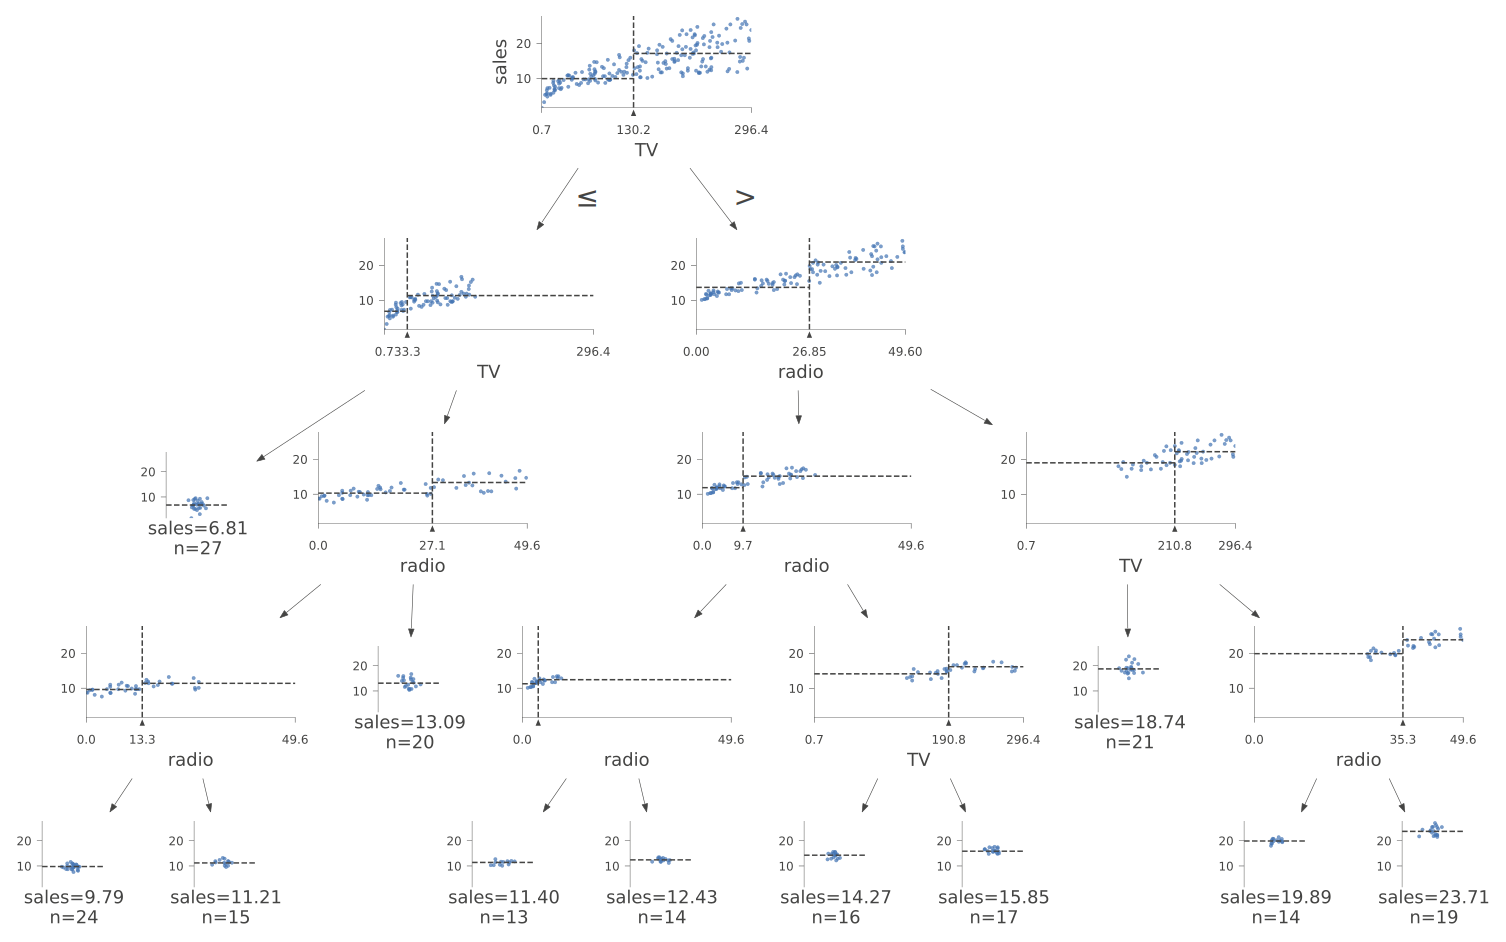

In [ ]:
dtv = dtreeviz.model(dt_4, X, y, feature_names=X.columns.tolist(), target_name='sales')
dtv.view(fontname='sans-serif', scale=2)